<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_7_Bag_of_Words_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Methods of classification and dimensionality reduction**


Paweł Lorek  
University of Wrocław

# LIST NR 7: Bag of words and Word2Vec



 <font face="Rage" size=2  > Updated: 08.04.2025 <font>

# Bag of words and Word2Vec

Word2Vec is in `gensim`, this should work (probably session must be restarted after installing these packages)

In [ ]:
!pip install --upgrade --force-reinstall gensim==4.3.3 numpy==1.26.4 scipy==1.13.1


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [ ]:
import gensim

from gensim.models import Word2Vec

from gensim.models import KeyedVectors

In [ ]:
import numpy as np
import time


import nltk
from nltk.corpus import brown, movie_reviews, treebank



import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import brown

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF

from sklearn.metrics.pairwise import cosine_similarity

## Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
documents = [
    "The quick brown fox jumped over the lazy dog.",
    "The dog slept in the afternoon.",
    "Foxes are wild animals.",
    "Dogs are loyal pets."
]

In [ ]:
# Convert texts to count vectors
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(documents)

# Display count vectors
print("Count Vectors (CountVectorizer):")
print(X_counts.toarray())
print("\nVocabulary:", count_vect.get_feature_names_out())

# Convert count vectors to tf-idf vectors
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Display tf-idf vectors
print("\nTF-IDF Vectors (TfidfTransformer):")
print(X_tfidf.toarray())
print("X_tfidf.toarray().shape = ",X_tfidf.toarray().shape)

Count Vectors (CountVectorizer):
[[0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 2 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 2 0]
 [0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]]

Vocabulary: ['afternoon' 'animals' 'are' 'brown' 'dog' 'dogs' 'fox' 'foxes' 'in'
 'jumped' 'lazy' 'loyal' 'over' 'pets' 'quick' 'slept' 'the' 'wild']

TF-IDF Vectors (TfidfTransformer):
[[0.         0.         0.         0.33135182 0.26124158 0.
  0.33135182 0.         0.         0.33135182 0.33135182 0.
  0.33135182 0.         0.33135182 0.         0.52248316 0.        ]
 [0.40462414 0.         0.         0.         0.31901032 0.
  0.         0.         0.40462414 0.         0.         0.
  0.         0.         0.         0.40462414 0.63802064 0.        ]
 [0.         0.52547275 0.41428875 0.         0.         0.
  0.         0.52547275 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.52547275]
 [0.         0.         0.41428875 0.         0.        

# Word2Vec:  train model from gensim

In [ ]:
nltk.download('brown')
nltk.download('treebank')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [ ]:
# Get 3 tokenized sentences
for i, sent in enumerate(brown.sents()[:3]):
    print(f"Sentence {i+1}:", sent)

Sentence 1: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
Sentence 2: ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
Sentence 3: ['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.']


In [ ]:
print("Calculating Word2Vec for 'brown' dataset .", end="", flush=True)
start_time = time.time()
w2v_brown = Word2Vec(brown.sents())
print("\t\t took %s seconds " % round((time.time() - start_time),5))

Calculating Word2Vec for 'brown' dataset .		 took 23.79453 seconds 


In [ ]:
print("Calculating Word2Vec for 'treebank' dataset .", end="", flush=True)
start_time = time.time()
w2v_tb = Word2Vec(treebank.sents())
print("\t\t took %s seconds " % round((time.time() - start_time),5))

Calculating Word2Vec for 'treebank' dataset .		 took 5.35417 seconds 


In [ ]:
print("dimension: ", len(w2v_brown.wv["apple"] ), " apple = ",w2v_brown.wv["apple"] )

dimension:  100  apple =  [ 0.08143343  0.07400153  0.02720112 -0.01212666 -0.01084281 -0.06188543
  0.0692202   0.16605689 -0.090877   -0.06923865  0.02568342 -0.07251153
  0.03662082  0.01833829  0.06384236 -0.0841139   0.02569582 -0.04598539
 -0.06104865 -0.11503848  0.05144107 -0.03458235  0.07917689  0.00338091
 -0.02340348 -0.06144354 -0.05744122 -0.03241669 -0.03035089  0.05086855
  0.11058821 -0.08864695  0.01934145 -0.11513834  0.01303874  0.06631132
 -0.00874173 -0.02583262 -0.03087896 -0.06014481  0.01559793 -0.10662501
  0.05363708  0.07803793  0.05646886 -0.03471953 -0.01566748  0.02065569
 -0.00119171  0.06162249  0.02107787 -0.08666132 -0.05073829 -0.05817253
 -0.05169495 -0.04647549  0.08964125  0.03325247 -0.01148814  0.0155735
  0.00095861  0.05391682 -0.05031252 -0.0164175  -0.09803831  0.09024674
  0.11067301  0.02876005 -0.06139804  0.09175976  0.01743803 -0.00307871
  0.12038614  0.00347538  0.08239029  0.04317671  0.06801575  0.0315593
  0.02120803  0.01674709 -0

In [ ]:
sample_words = ["apple","pear","car","house","building"]

for w1 in sample_words:
  for w2 in sample_words:

    print("w1=",w1,", w2=",w2,"\t\t\t brown: cosine_similarity(w1,w2) = ", cosine_similarity([w2v_brown.wv[w1]],[w2v_brown.wv[w2]]))

w1= apple , w2= apple 			 brown: cosine_similarity(w1,w2) =  [[1.]]
w1= apple , w2= pear 			 brown: cosine_similarity(w1,w2) =  [[0.7839172]]
w1= apple , w2= car 			 brown: cosine_similarity(w1,w2) =  [[0.60519785]]
w1= apple , w2= house 			 brown: cosine_similarity(w1,w2) =  [[0.49910235]]
w1= apple , w2= building 			 brown: cosine_similarity(w1,w2) =  [[0.7205136]]
w1= pear , w2= apple 			 brown: cosine_similarity(w1,w2) =  [[0.7839172]]
w1= pear , w2= pear 			 brown: cosine_similarity(w1,w2) =  [[0.9999999]]
w1= pear , w2= car 			 brown: cosine_similarity(w1,w2) =  [[0.64057255]]
w1= pear , w2= house 			 brown: cosine_similarity(w1,w2) =  [[0.53379923]]
w1= pear , w2= building 			 brown: cosine_similarity(w1,w2) =  [[0.8066172]]
w1= car , w2= apple 			 brown: cosine_similarity(w1,w2) =  [[0.60519785]]
w1= car , w2= pear 			 brown: cosine_similarity(w1,w2) =  [[0.64057255]]
w1= car , w2= car 			 brown: cosine_similarity(w1,w2) =  [[1.]]
w1= car , w2= house 			 brown: cosine_similarit

In [ ]:
print("MOST SIMILAR WORDS:")

for w1 in sample_words:
  print(w1," -> ",w2v_brown.wv.most_similar(w1))


MOST SIMILAR WORDS:
apple  ->  [('securely', 0.9414404034614563), ('disguised', 0.9405363202095032), ('replace', 0.9362746477127075), ('insert', 0.9360327124595642), ('thoroughly', 0.9343289136886597), ('wired', 0.932741641998291), ('attempts', 0.9318149089813232), ('shadows', 0.9300280809402466), ('fancy', 0.9281942844390869), ('bell', 0.9280454516410828)]
pear  ->  [('gold', 0.9518917202949524), ('tax-free', 0.9496251344680786), ('outboard', 0.9449001550674438), ('formulation', 0.9445441365242004), ('enclosed', 0.9431270956993103), ('horror', 0.9429399967193604), ('bloat', 0.9424845576286316), ('chill', 0.9421800374984741), ('relief', 0.941709041595459), ('drying', 0.9415666460990906)]
car  ->  [('house', 0.9466452598571777), ('hall', 0.9047073125839233), ('room', 0.9045464396476746), ('corner', 0.9017900228500366), ('town', 0.9009472131729126), ('road', 0.8943363428115845), ('desk', 0.892423152923584), ('bed', 0.8916290402412415), ('jig', 0.8834788799285889), ('ball', 0.879925608634

^^^ **Not too good... lets try another, pre-trained model**

## Word2Vec: Using a pre-trained model

Model trained on Google News:

Load trained model (SLIM version ~ 260 MB, one may find full version ~ 1.5GB)

In [ ]:
!wget -P /root/input/ -c "https://github.com/eyaler/word2vec-slim/raw/master/GoogleNews-vectors-negative300-SLIM.bin.gz"

--2025-05-06 11:57:37--  https://github.com/eyaler/word2vec-slim/raw/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz [following]
--2025-05-06 11:57:37--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
!ls /root/input

GoogleNews-vectors-negative300-SLIM.bin.gz


In [ ]:
!file /root/input/GoogleNews-vectors-negative300-SLIM.bin.gz

/root/input/GoogleNews-vectors-negative300-SLIM.bin.gz: gzip compressed data, was "GoogleNews-vectors-negative300-SLIM.bin", last modified: Wed Sep 14 17:08:49 2016, max compression, original size modulo 2^32 362017275


In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300-SLIM.bin.gz'
w2v_google = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
print("dim = ", len(w2v_google["apple"]))

dim =  300


In [ ]:

for w1 in sample_words:
  for w2 in sample_words:

    print("w1=",w1,", w2=",w2,"\t\t\t  cosine_similarity(w1,w2) = ", cosine_similarity([w2v_google[w1]],[w2v_google[w2]]))

w1= apple , w2= apple 			  cosine_similarity(w1,w2) =  [[0.9999999]]
w1= apple , w2= pear 			  cosine_similarity(w1,w2) =  [[0.64506966]]
w1= apple , w2= car 			  cosine_similarity(w1,w2) =  [[0.12830707]]
w1= apple , w2= house 			  cosine_similarity(w1,w2) =  [[0.05334292]]
w1= apple , w2= building 			  cosine_similarity(w1,w2) =  [[0.01450158]]
w1= pear , w2= apple 			  cosine_similarity(w1,w2) =  [[0.64506966]]
w1= pear , w2= pear 			  cosine_similarity(w1,w2) =  [[1.]]
w1= pear , w2= car 			  cosine_similarity(w1,w2) =  [[0.10614194]]
w1= pear , w2= house 			  cosine_similarity(w1,w2) =  [[0.07710931]]
w1= pear , w2= building 			  cosine_similarity(w1,w2) =  [[-0.00473523]]
w1= car , w2= apple 			  cosine_similarity(w1,w2) =  [[0.12830707]]
w1= car , w2= pear 			  cosine_similarity(w1,w2) =  [[0.10614194]]
w1= car , w2= car 			  cosine_similarity(w1,w2) =  [[1.0000001]]
w1= car , w2= house 			  cosine_similarity(w1,w2) =  [[0.39060056]]
w1= car , w2= building 			  cosine_similarity

In [ ]:
print("MOST SIMILAR WORDS:")

for w1 in sample_words:
  print(w1," -> ",w2v_google.most_similar(w1))


MOST SIMILAR WORDS:
apple  ->  [('apples', 0.7203598618507385), ('pear', 0.6450697183609009), ('fruit', 0.6410147547721863), ('berry', 0.6302294135093689), ('pears', 0.613396167755127), ('strawberry', 0.605826199054718), ('peach', 0.6025873422622681), ('potato', 0.5960935354232788), ('grape', 0.5935865640640259), ('blueberry', 0.5866668224334717)]
pear  ->  [('pears', 0.7719404101371765), ('apricot', 0.7096841335296631), ('apricots', 0.6913131475448608), ('nectarine', 0.6751577854156494), ('almond', 0.6685435771942139), ('berry', 0.6649978160858154), ('cherries', 0.66241854429245), ('asparagus', 0.6483862400054932), ('apple', 0.6450697183609009), ('melon', 0.6406576037406921)]
car  ->  [('vehicle', 0.7821096181869507), ('cars', 0.7423830032348633), ('SUV', 0.7160962820053101), ('minivan', 0.6907036304473877), ('truck', 0.6735790371894836), ('Car', 0.6677609086036682), ('Jeep', 0.6511331796646118), ('scooter', 0.638153076171875), ('sedan', 0.6336702108383179), ('motorcycle', 0.625605404

### Lets make PCA of vocabulary and plot `sample_words` and most similar words in 2d:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA


In [ ]:
# Collect words: each base word + its top 10 similar
words_to_plot = []
word_groups = {}  # mapping: word -> group index

for i, word in enumerate(sample_words):
    similar_words = [w for w, _ in w2v_google.most_similar(word, topn=10)]
    group_words = [word] + similar_words
    words_to_plot.extend(group_words)
    for w in group_words:
        word_groups[w] = i  # assign group index

# Extract vectors
vectors = np.array([w2v_google[w] for w in words_to_plot])

In [ ]:
len(vectors)

55

### PCA to 2d

In [ ]:
# Reduce to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)


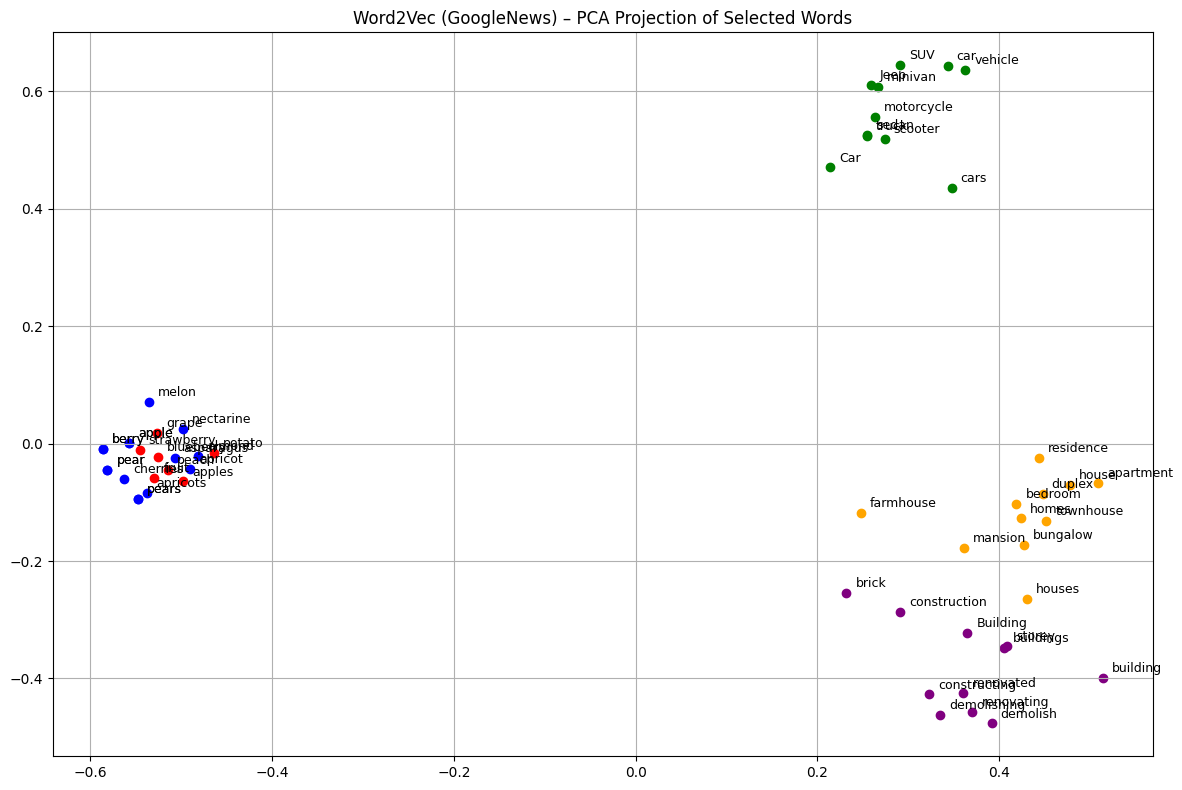

In [ ]:
# Plot
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, (word, coord) in enumerate(zip(words_to_plot, vectors_2d)):
    group = word_groups[word]
    plt.scatter(coord[0], coord[1], color=colors[group])
    plt.text(coord[0]+0.01, coord[1]+0.01, word, fontsize=9)


plt.title("Word2Vec (GoogleNews) – PCA Projection of Selected Words")
plt.grid(True)
plt.tight_layout()
plt.show()

### PCA to 3d

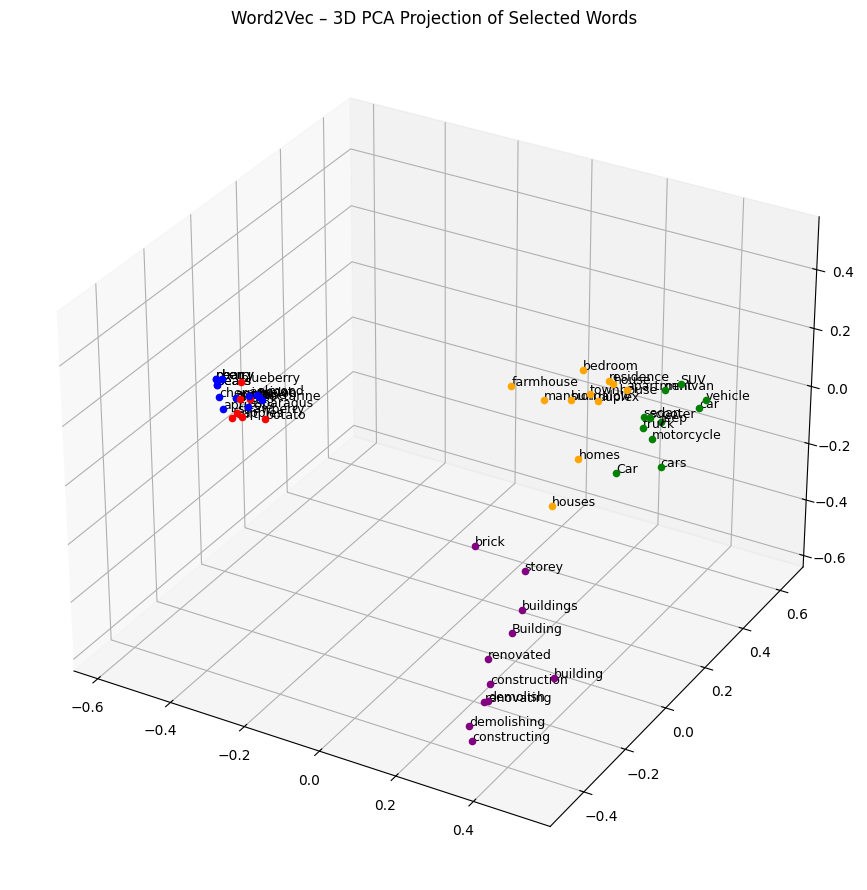

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

words_to_plot = []
word_groups = {}

for i, word in enumerate(sample_words):
    similar_words = [w for w, _ in w2v_google.most_similar(word, topn=10)]
    group_words = [word] + similar_words
    words_to_plot.extend(group_words)
    for w in group_words:
        word_groups[w] = i

# Extract vectors
vectors = np.array([w2v_google[w] for w in words_to_plot])

# Reduce to 3D using PCA
pca3 = PCA(n_components=3)
vectors_3d = pca3.fit_transform(vectors)

# Plot in 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']

for word, coord in zip(words_to_plot, vectors_3d):
    group = word_groups[word]
    ax.scatter(coord[0], coord[1], coord[2], color=colors[group])
    ax.text(coord[0], coord[1], coord[2], word, fontsize=9)


ax.set_title("Word2Vec – 3D PCA Projection of Selected Words")
plt.tight_layout()
plt.show()



^^^ **MUCH better**

**Germany - Berlin + Paris = ?**

In [ ]:
print("Germany - Berlin + Paris in 'GoogleNewsSLIM': ",w2v_google.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1))

Germany - Berlin + Paris in 'GoogleNewsSLIM':  [('France', 0.7884092926979065)]


**Germany - Berlin + Warsaw = ?**

In [ ]:
print("Germany - Berlin + Warsaw in 'GoogleNewsSLIM': ",w2v_google.most_similar(positive=['Warsaw','Germany'], negative=['Berlin'], topn = 1))

Germany - Berlin + Warsaw in 'GoogleNewsSLIM':  [('Poland', 0.7386027574539185)]


# Classification of posts from dataset `20newsgroups`

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Wczytanie danych treningowych
newsgroups_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(newsgroups_data.data, newsgroups_data.target, test_size=0.25, random_state=42)

In [ ]:


label_names = newsgroups_data.target_names

# Wyświetlenie przykładowych danych
print("label_names = ",label_names)
print("len(label_names) = ",len(label_names))

print("\nSample post (from training set): id=0")
print("Post class = ",y_train[0], " -> ", label_names[y_train[0]])
print("\n POST: \n", X_train[0])

label_names =  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
len(label_names) =  20

Sample post (from training set): id=0
Post class =  8  ->  rec.motorcycles

 POST: 
 Subject: Re: Ed must be a Daemon Child!!
From: REE700A@MAINE.MAINE.EDU
 <1993Apr2.003029.1962@adobe.com><1993Apr2.163021.17074@linus.mitre.org>
Organization: University of Maine System
Lines: 8

Ed's heading out on the highway?

Did he finally buy a bike or is he a passanger?

Jeff Andle   DoD #3005  1976 KZ900     REE700A@MAINE.MAINE.EDU

IntermittentNet access arranged through Bowdoin College.  Please reply
via e-mail, since a followup might expire before I see the Net again.

#Q7.1

For the training set `X_train` from the 20 Newsgroups dataset:
* Represent each document in `X_train` in two different ways:
** **Bag of Words**: use `CountVectorizer` o transform each document into a high-dimensional sparse vector of word counts (you may limit vocabulary size, e.g. `max_features=5000`).
** **Word2Vec average**: represent each document as the **average** of Word2Vec vectors of all words in the document that are present in the vocabulary of a pre-trained Word2Vec model (GoogleNews).

* For both representations: apply **PCA** to reduce data to `d=2` and `d=3`, plot the resulting points, coloring each point according to its document class label (i.e., `y_train`).

* (Additionally: you may apply `t-SNE` to reduce data to 2d)



This is how you can obtain both representations:
```python
def avg_w2v(texts, model, dim=300):
    vecs = []
    for doc in texts:
        words = [w for w in doc.lower().split() if w in model]
        if words:
            vec = np.mean([model[w] for w in words], axis=0)
        else:
            vec = np.zeros(dim)
        vecs.append(vec)
    return np.array(vecs)   
    
    
    
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)


# --- Word2Vec representation ---
X_train_w2v = avg_w2v(X_train, w2v_google)
X_test_w2v = avg_w2v(X_test, w2v_google)
```

#Q7.2
Use the 20 Newsgroups dataset to compare the performance of **Bag-of-Words** and **Word2Vec** representations in a **text classification** task.


###  Steps

1. **Load  data**:
   - Load and split the dataset into `X_train`, `X_test`, `y_train`, `y_test`.

2. **Generate document representations**:
   - **Bag-of-Words (BoW)**: Use `CountVectorizer` to convert each document into a sparse vector of word counts. You may limit vocabulary size (e.g. `max_features=5000`).
   - **Word2Vec (W2V)**: Represent each document by **averaging** the Word2Vec vectors of all known words (from a `GoogleNews` pre-trained model).

3. **Train classifiers**:
   - Try at least one classifier (e.g., `LogisticRegression`, `MultinomialNB`, `RandomForest`, `SVC`).
   - For each combination of representation ×  classifier:
     - Train the classifier on `X_train`, `y_train`.
     - Evaluate accuracy (or optionally F1-score) on `X_test`, `y_test`.

4. **Compare and summarize results**:
   - Present your results in a table like the one below:

| Representation | Classifier         | Accuracy |
|----------------|-------------------|----------|
| Bag-of-Words   | LogisticRegression | 0.85     |
| Word2Vec       | RandomForest       | 0.79     |
| ...            | ...                | ...      |



###   Notes

- vectorization and classification, and `gensim` for loading Word2Vec embeddings.
- If a document contains no known Word2Vec words, you may represent it with a zero vector.

